# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [322]:
xt = []
yt = []
dxt= []
dyt= []
Kx = []
Ky = []
Kdx= []
Kdy= []

def savestates(x, K):
    print('------------------------------------')
    print(K)
    print('------------------------------------')
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,1]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,1]))

In [323]:
import numpy as np

k = list()

########################################

def filter(x, E):
    print (range(len(measurements)))
    for n in range(len(measurements)):
        print ('called XXXX')
        
        # prediction
        x = (F * x) + u
        E = F * E * F.transpose()

        # measurement update
        Z = np.matrix([measurements[n]])
        S = H * E * H.transpose() + R
        K = E * H.transpose() * np.linalg.inv(S)
        k.append(K)
        x = x + (K * (Z.transpose() - (H * x)))
        E = (I - (K * H)) * E
        
        print('x= ')
        print(x)
        print('E= ')
        print(E)
        savestates(x, K)
########################################

In [324]:
dt = 0.1

E = np.matrix([[0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1000, 0.0],
              [0.0, 0.0, 0.0, 1000]])
F = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
H = np.matrix([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])
R = np.matrix([[1.0, 0.0], [0.0, 1.0]])
I = np.matrix([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])

In [325]:
print("### First Experiment ###")
measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = [4., 12.]


x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### First Experiment ###


In [326]:
filter(x, E)

range(0, 6)
called XXXX
x= 
[[  4.90909091]
 [ 10.19090909]
 [  9.09090909]
 [-19.09090909]]
E= 
[[ 0.90909091  0.          9.09090909  0.        ]
 [ 0.          0.90909091  0.          9.09090909]
 [ 9.09090909  0.         90.90909091  0.        ]
 [ 0.          9.09090909  0.         90.90909091]]
------------------------------------
[[0.90909091 0.        ]
 [0.         0.90909091]
 [9.09090909 0.        ]
 [0.         9.09090909]]
------------------------------------
called XXXX
x= 
[[  5.96078431]
 [  8.08235294]
 [  9.80392157]
 [-20.58823529]]
E= 
[[ 0.78431373  0.          3.92156863  0.        ]
 [ 0.          0.78431373  0.          3.92156863]
 [ 3.92156863  0.         19.60784314  0.        ]
 [ 0.          3.92156863  0.         19.60784314]]
------------------------------------
[[0.78431373 0.        ]
 [0.         0.78431373]
 [3.92156863 0.        ]
 [0.         3.92156863]]
------------------------------------
called XXXX
x= 
[[  6.9787234 ]
 [  6.04468085]
 [  9.9290

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

[9.090909090909092, 9.803921568627452, 9.929078014184398, 9.966777408637874, 9.981851179673322, 9.989023051591658]
[-19.09090909090909, -20.58823529411764, -20.85106382978723, -20.93023255813953, -20.96188747731397, -20.976948408342476]
range(0, 6)


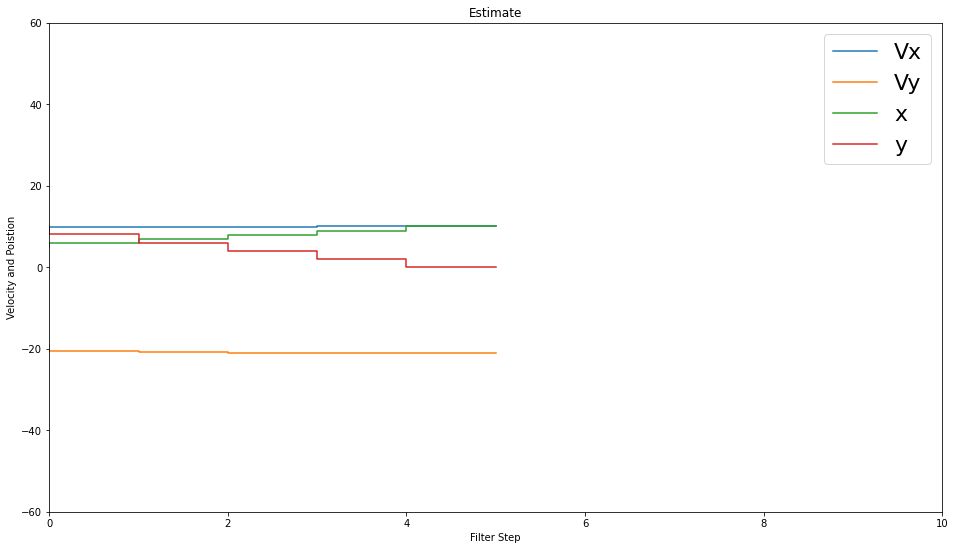

In [327]:
print (dxt)
print (dyt)
print (range(len(measurements)))
import matplotlib.pyplot as plt

def plot_x():
    fig = plt.figure(figsize=(16,9))
    plt.step(range(len(measurements)),dxt, label='Vx')
    plt.step(range(len(measurements)),dyt, label='Vy')
    
    plt.step(range(len(measurements)),xt, label='x')
    plt.step(range(len(measurements)),yt, label='y')

    plt.xlabel('Filter Step')
    plt.title('Estimate')
    plt.legend(loc='best',prop={'size':22})
    plt.xlim([0, 10])
    plt.ylim([-60, 60])
    plt.ylabel('Velocity and Poistion')



plot_x()

Visualize the components of the $ K $ matrix below

[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199, 0.4537205081669692, 0.39517014270032935]
[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199, 0.4537205081669692, 0.39517014270032935]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497, 0.9074410163339384, 0.658616904500549]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497, 0.9074410163339384, 0.658616904500549]


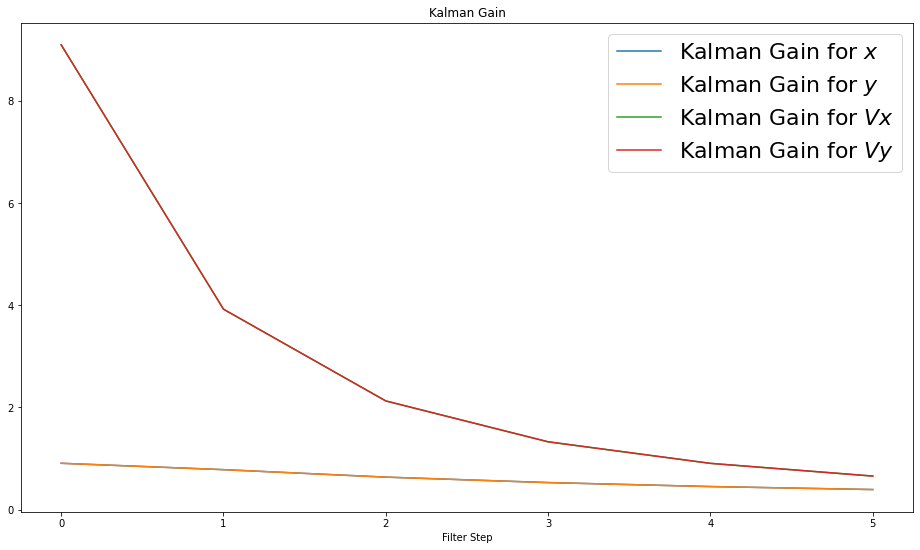

In [328]:
def plot_K():
    fig = plt.figure(figsize=(16,9))
    print(Kx)
    print(Ky)
    print(Kdx)
    print(Kdy)
    plt.plot(range(len(measurements)),Kx, label='Kalman Gain for $x$')
    plt.plot(range(len(measurements)),Ky, label='Kalman Gain for $y$')
    plt.plot(range(len(measurements)),Kdx, label='Kalman Gain for $Vx$')
    plt.plot(range(len(measurements)),Kdy, label='Kalman Gain for $Vy$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain')
    plt.legend(loc='best',prop={'size':22})



plot_K()

In [329]:
print("### Second Experiment ###")
measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
initial_xy = [-4., 8.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Second Experiment ###


In [330]:
xt = []
yt = []
dxt = []
dyt = []
Kx = []
Ky = []
Kdx = []
Kdy = []
filter(x, E)

range(0, 4)
called XXXX
x= 
[[  0.54545455]
 [  4.37272727]
 [ 45.45454545]
 [-37.27272727]]
E= 
[[ 0.90909091  0.          9.09090909  0.        ]
 [ 0.          0.90909091  0.          9.09090909]
 [ 9.09090909  0.         90.90909091  0.        ]
 [ 0.          9.09090909  0.         90.90909091]]
------------------------------------
[[0.90909091 0.        ]
 [0.         0.90909091]
 [9.09090909 0.        ]
 [0.         9.09090909]]
------------------------------------
called XXXX
x= 
[[  5.80392157]
 [  0.16078431]
 [ 49.01960784]
 [-40.19607843]]
E= 
[[ 0.78431373  0.          3.92156863  0.        ]
 [ 0.          0.78431373  0.          3.92156863]
 [ 3.92156863  0.         19.60784314  0.        ]
 [ 0.          3.92156863  0.         19.60784314]]
------------------------------------
[[0.78431373 0.        ]
 [0.         0.78431373]
 [3.92156863 0.        ]
 [0.         3.92156863]]
------------------------------------
called XXXX
x= 
[[ 10.89361702]
 [ -3.91276596]
 [ 49.6453

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

[45.45454545454546, 49.01960784313726, 49.645390070921984, 49.833887043189364]
[-37.27272727272727, -40.19607843137255, -40.709219858156025, -40.86378737541528]
range(0, 4)


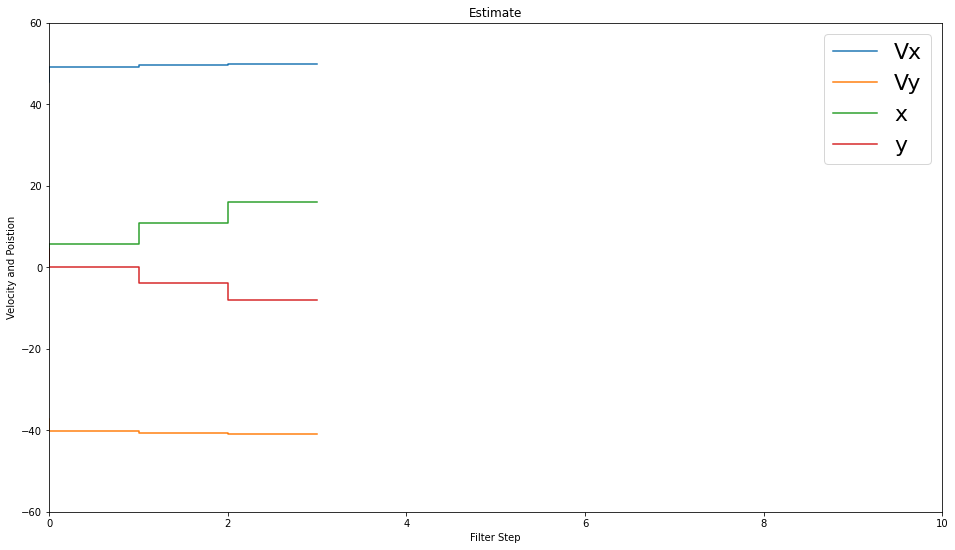

In [331]:
print (dxt)
print (dyt)
print (range(len(measurements)))
plot_x()

Visualize the components of the $ K $ matrix below

[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199]
[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497]


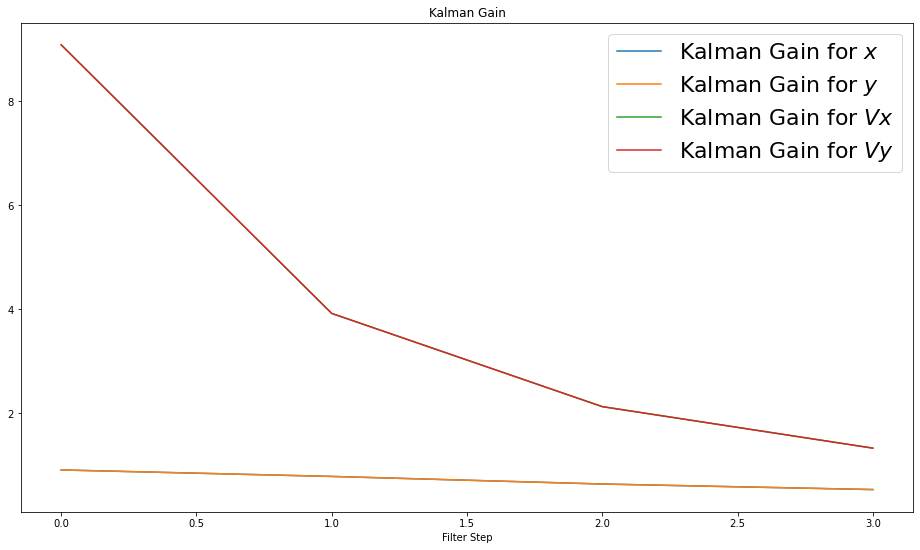

In [332]:
plot_K()

In [333]:
print("### Third Experiment ###")
measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
initial_xy = [1., 19.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Third Experiment ###


In [334]:
xt = []
yt = []
dxt = []
dyt = []
Kx = []
Ky = []
Kdx = []
Kdy = []
filter(x, E)

range(0, 4)
called XXXX
x= 
[[  1.        ]
 [ 17.19090909]
 [  0.        ]
 [-19.09090909]]
E= 
[[ 0.90909091  0.          9.09090909  0.        ]
 [ 0.          0.90909091  0.          9.09090909]
 [ 9.09090909  0.         90.90909091  0.        ]
 [ 0.          9.09090909  0.         90.90909091]]
------------------------------------
[[0.90909091 0.        ]
 [0.         0.90909091]
 [9.09090909 0.        ]
 [0.         9.09090909]]
------------------------------------
called XXXX
x= 
[[  1.        ]
 [ 15.08235294]
 [  0.        ]
 [-20.58823529]]
E= 
[[ 0.78431373  0.          3.92156863  0.        ]
 [ 0.          0.78431373  0.          3.92156863]
 [ 3.92156863  0.         19.60784314  0.        ]
 [ 0.          3.92156863  0.         19.60784314]]
------------------------------------
[[0.78431373 0.        ]
 [0.         0.78431373]
 [3.92156863 0.        ]
 [0.         3.92156863]]
------------------------------------
called XXXX
x= 
[[  1.        ]
 [ 13.04468085]
 [  0.    

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

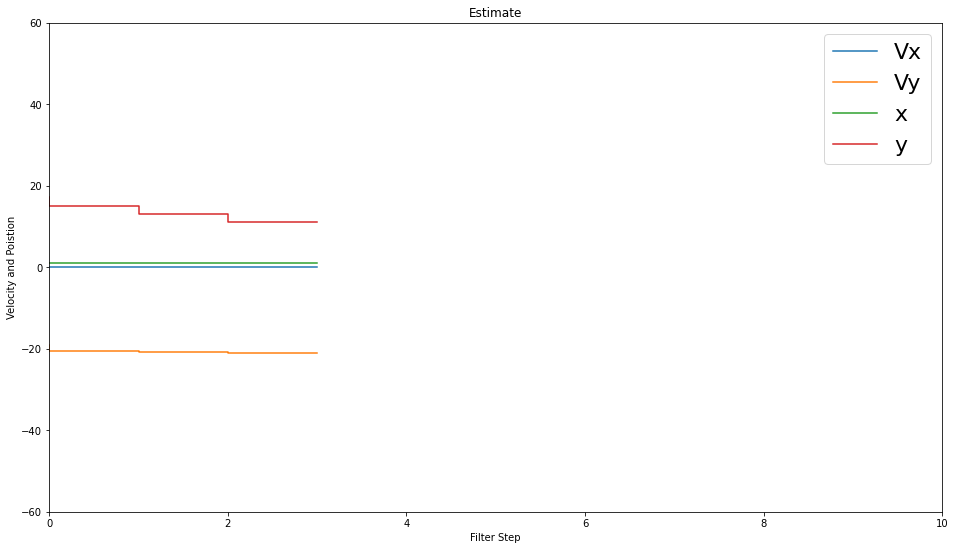

In [335]:
plot_x()

Visualize the components of the $ K $ matrix below

[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199]
[0.9090909090909092, 0.7843137254901961, 0.6382978723404255, 0.5315614617940199]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497]
[9.090909090909092, 3.9215686274509802, 2.1276595744680855, 1.3289036544850497]


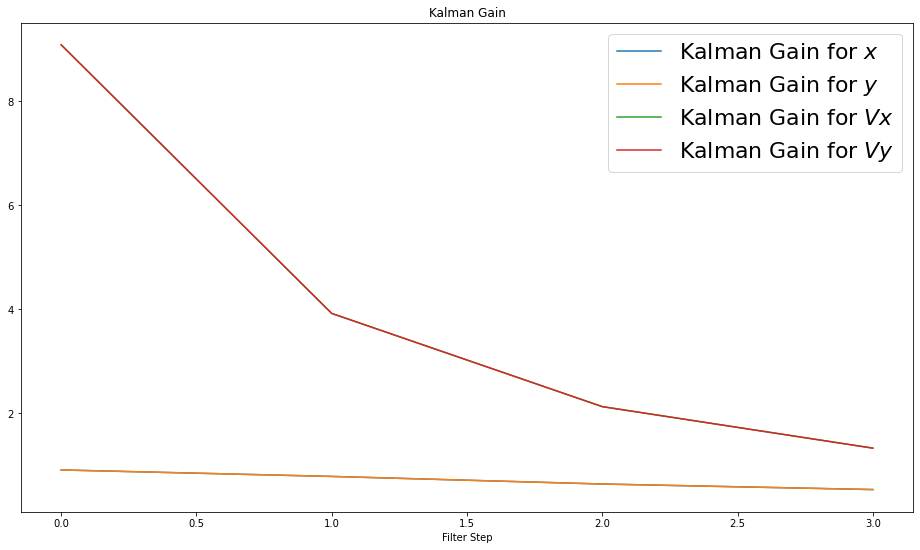

In [336]:
plot_K()